# Project Template and Guidance

This Notebook is intended to provide some guidance for getting started with creating your first complete project workflow.

## Step 0 | Setup and Imports

Start by saving this Notebook to your Google Drive account. Then go to your Google Drive, click on the Colab Notebooks folder to find
You'll have to log into Google Drive this way if you want to load your dataset or save save your work as a new dataset.

In [36]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project/'
os.chdir(drive_path + project_folder)

In [38]:
# Check which files are in your Project folder
os.listdir()

['Life_Evaluation_GDP_PerCap.csv',
 'Dentist_Density.csv',
 'uhc.csv',
 'merged_data_with_uhc.csv',
 'histogram_density.png',
 'histogram_gdppercap.png',
 'residualplot.png',
 'scatterplot_withuhc.png',
 'Copy of Project_Template.ipynb']

In [39]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [40]:
# Once you've mounted Google Drive, you can open a dataset from your project folder
data = pd.read_csv('Dentist_Density.csv')

In [41]:
#Change code to Times New Roman
plt.rcParams['font.family'] = 'Liberation Serif'

## Step 1 (Part 1) | Univariate EDA

Summarize the main variables of interest.

In [42]:
data.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,RATE_PER_10000_N
0,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,1991,YEAR,620,COUNTRY,PUBLISHED,Density of dentists,Portugal,1.70
1,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,1991,YEAR,642,COUNTRY,PUBLISHED,Density of dentists,Romania,2.82
2,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,1991,YEAR,659,COUNTRY,PUBLISHED,Density of dentists,Saint Kitts and Nevis,1.73
3,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,1991,YEAR,705,COUNTRY,PUBLISHED,Density of dentists,Slovenia,5.27
4,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,1991,YEAR,724,COUNTRY,PUBLISHED,Density of dentists,Spain,2.87


In [43]:
#filter data to only keep data from 2020
data_2020 = data[data['DIM_TIME'] == 2020]
data_2020.head()

,IND_ID,IND_CODE,IND_UUID,IND_PER_CODE,DIM_TIME,DIM_TIME_TYPE,DIM_GEO_CODE_M49,DIM_GEO_CODE_TYPE,DIM_PUBLISH_STATE_CODE,IND_NAME,GEO_NAME_SHORT,RATE_PER_10000_N
1010,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,2020,YEAR,4,COUNTRY,PUBLISHED,Density of dentists,Afghanistan,0.06
1011,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,2020,YEAR,20,COUNTRY,PUBLISHED,Density of dentists,Andorra,11.63
1012,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,2020,YEAR,31,COUNTRY,PUBLISHED,Density of dentists,Azerbaijan,3.18
1013,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,2020,YEAR,32,COUNTRY,PUBLISHED,Density of dentists,Argentina,11.74
1014,9F88C44HWF_0010,HWF_0010,9F88C44,HWF_0010,2020,YEAR,36,COUNTRY,PUBLISHED,Density of dentists,Australia,6.09


In [44]:
#remove unneeded columns from the data
data_2020 = data[data['DIM_TIME'] == 2020]
data_condensed = data_2020[['DIM_TIME', 'GEO_NAME_SHORT', 'RATE_PER_10000_N']]
data_condensed.head()

,DIM_TIME,GEO_NAME_SHORT,RATE_PER_10000_N
1010,2020,Afghanistan,0.06
1011,2020,Andorra,11.63
1012,2020,Azerbaijan,3.18
1013,2020,Argentina,11.74
1014,2020,Australia,6.09


Text(0, 0.5, 'Count')

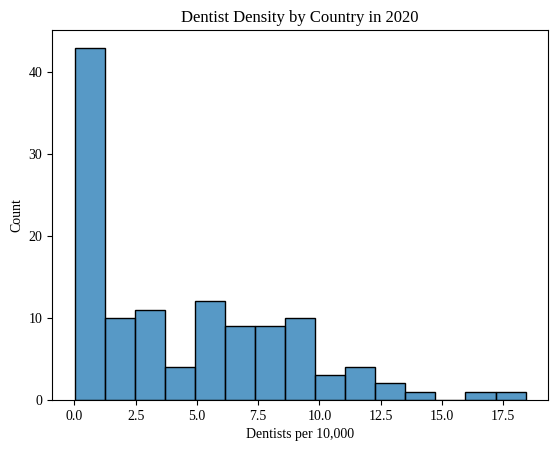

In [45]:
sns.histplot(data=data_2020, x='RATE_PER_10000_N', bins=15)
plt.title('Dentist Density by Country in 2020')
plt.xlabel('Dentists per 10,000')
plt.ylabel('Count')

In [46]:
data2 = pd.read_csv('Life_Evaluation_GDP_PerCap.csv')

In [47]:
data2.head()

,Year,Country,Life_Evaluation,GDP_Per_Cap
0,2024,Afghanistan,1.364,549.27
1,2023,Afghanistan,1.721,550.97
2,2022,Afghanistan,1.859,535.53
3,2021,Afghanistan,2.404,522.25
4,2020,Afghanistan,2.523,477.83


In [48]:
# only keep data from 2020 and only keep GDP per cap column
data2_filtered = data2[data2['Year'] == 2020]
data2_filtered = data2_filtered.drop(columns=['Life_Evaluation'])
data2_filtered.head()

,Year,Country,GDP_Per_Cap
4,2020,Afghanistan,477.83
17,2020,Albania,4450.40
30,2020,Algeria,4047.24
49,2020,Argentina,9947.75
62,2020,Armenia,4204.17


In [49]:
#merged data on dentist density and gdp per cap, only keeping countries that were present in both datasets for 2020
data_condensed_country = data_condensed.rename(columns={'GEO_NAME_SHORT': 'Country'})
merged_data = pd.merge(data_condensed_country, data2_filtered, on='Country', how='inner')
merged_data.head()

,DIM_TIME,Country,RATE_PER_10000_N,Year,GDP_Per_Cap
0,2020,Afghanistan,0.06,2020,477.83
1,2020,Azerbaijan,3.18,2020,4564.02
2,2020,Argentina,11.74,2020,9947.75
3,2020,Australia,6.09,2020,54492.64
4,2020,Austria,6.11,2020,47000.87


In [50]:
#take log of GDP per cap
merged_data['log_GDP_Per_Cap'] = np.log(merged_data['GDP_Per_Cap'])

Text(0, 0.5, 'Count')

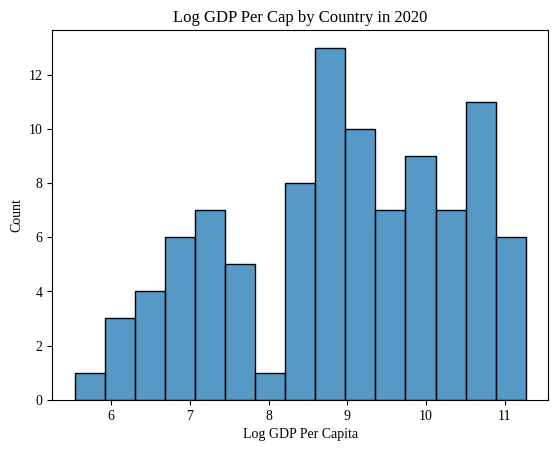

In [51]:
sns.histplot(data=merged_data, x='log_GDP_Per_Cap', bins = 15)
plt.title('Log GDP Per Cap by Country in 2020')
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Count')

## Step 2 (Part 2) | Bivariate EDA

Visualize the main relationships of interest.

Initial question: Is there a relationship between log gdp per capita and density of dentists per 10000?

Text(0.5, 1.0, 'Dentist Density by log GDP Per Capita')

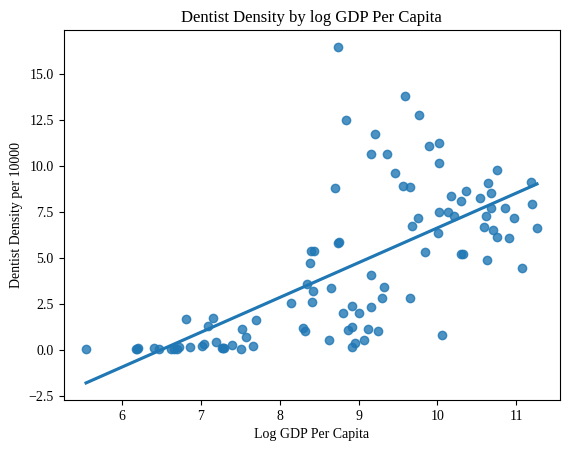

In [52]:
merged_data['log_GDP_Per_Cap'] = np.log(merged_data['GDP_Per_Cap'])
sns.regplot(data=merged_data, x='log_GDP_Per_Cap', y='RATE_PER_10000_N', ci=None)

plt.xlabel('Log GDP Per Capita')
plt.ylabel('Dentist Density per 10000')
plt.title('Dentist Density by log GDP Per Capita')

## Step 3 (Part 3 - 5)

Develop your statistical model.

1. Write down you null hypothesis- There is no relationship between a country's log GDP per capita and its dentist density (β1 = 0).
2. Write down your statistical model- RATE_PER_10000_N = β0 + β1 * log_GDP_Per_Cap + ε
3. Run your statistical model
4. Visualize your statistical model (if appropriate)

In [53]:
# Null Hypothesis- There is no linear relationship between a country's log GDP per capita and its dentist density (β1 = 0).
# Model- RATE_PER_10000_N = β0 + β1 * log_GDP_Per_Cap + ε

modellog = smf.ols('RATE_PER_10000_N ~ log_GDP_Per_Cap', data=merged_data).fit()
print(modellog.summary().tables[1])

                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.2855      1.898     -6.474      0.000     -16.052      -8.519
log_GDP_Per_Cap     1.8908      0.210      8.997      0.000       1.474       2.308


In [54]:
data3 = pd.read_csv('uhc.csv')
data3.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,HSS_UHCLEGISLATION,Countries that have passed legislation on Univ...,text,EMR,Eastern Mediterranean,Country,AFG,Afghanistan,Year,2017,...,NaN,NaN,NaN,NaN,NaN,No,823,NaN,EN,2017-04-04T04:00:00.000Z
1,HSS_UHCLEGISLATION,Countries that have passed legislation on Univ...,text,EUR,Europe,Country,ALB,Albania,Year,2017,...,NaN,NaN,NaN,NaN,NaN,No,823,NaN,EN,2017-04-04T04:00:00.000Z
2,HSS_UHCLEGISLATION,Countries that have passed legislation on Univ...,text,AFR,Africa,Country,AGO,Angola,Year,2017,...,NaN,NaN,NaN,NaN,NaN,No,823,NaN,EN,2017-04-04T04:00:00.000Z
3,HSS_UHCLEGISLATION,Countries that have passed legislation on Univ...,text,AMR,Americas,Country,BHS,Bahamas,Year,2017,...,NaN,NaN,NaN,NaN,NaN,No,823,NaN,EN,2017-04-04T04:00:00.000Z
4,HSS_UHCLEGISLATION,Countries that have passed legislation on Univ...,text,SEAR,South-East Asia,Country,BGD,Bangladesh,Year,2017,...,NaN,NaN,NaN,NaN,NaN,No,823,NaN,EN,2017-04-04T04:00:00.000Z


In [55]:
# filter dataset to only include country and if they have universal healthcare
data3_filtered = data3[['Location', 'Value']]
display(data3_filtered.head())

,Location,Value
0,Afghanistan,No
1,Albania,No
2,Angola,No
3,Bahamas,No
4,Bangladesh,No


In [56]:
# merge data on uhc with data on GDP per cap and dentist density, only keeping countries present for all 3 variables
data3_filtered = data3_filtered.rename(columns={'Location': 'Country'})
merged_data_with_uhc = pd.merge(merged_data, data3_filtered, on='Country', how='inner')
display(merged_data_with_uhc.head())

,DIM_TIME,Country,RATE_PER_10000_N,Year,GDP_Per_Cap,log_GDP_Per_Cap,Value
0,2020,Afghanistan,0.06,2020,477.83,6.169255,No
1,2020,Azerbaijan,3.18,2020,4564.02,8.425959,Yes
2,2020,Argentina,11.74,2020,9947.75,9.205102,Yes
3,2020,Australia,6.09,2020,54492.64,10.905821,Yes
4,2020,Austria,6.11,2020,47000.87,10.757921,Yes


In [57]:
#made uhc indicator a binary variable (0=no uhc, 1=yes uhc)
merged_data_with_uhc['uhc_indicator'] = merged_data_with_uhc['Value'].map({'No': 0, 'Yes': 1})
display(merged_data_with_uhc.head())

,DIM_TIME,Country,RATE_PER_10000_N,Year,GDP_Per_Cap,log_GDP_Per_Cap,Value,uhc_indicator
0,2020,Afghanistan,0.06,2020,477.83,6.169255,No,0
1,2020,Azerbaijan,3.18,2020,4564.02,8.425959,Yes,1
2,2020,Argentina,11.74,2020,9947.75,9.205102,Yes,1
3,2020,Australia,6.09,2020,54492.64,10.905821,Yes,1
4,2020,Austria,6.11,2020,47000.87,10.757921,Yes,1


Text(0, 0.5, 'Count')

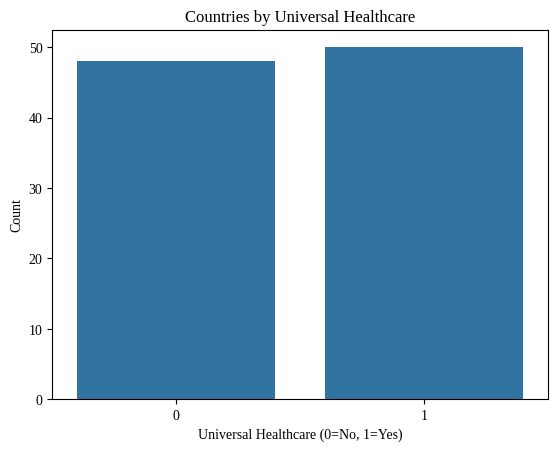

In [58]:
sns.countplot(data=merged_data_with_uhc, x='uhc_indicator')
plt.title('Countries by Universal Healthcare')
plt.xlabel('Universal Healthcare (0=No, 1=Yes)')
plt.ylabel('Count')

In [59]:
# take log of GDP per cap
merged_data_with_uhc['log_GDP_Per_Cap'] = np.log(merged_data_with_uhc['GDP_Per_Cap'])

In [60]:
#null hypothesis- There is no difference in relationship between GDP per capita and density of dentists per 10,000 between countries with and without universal healthcare.
#alternative hypothesis- There is a difference in relationship between GDP per capita and density of dentists per 10,000 between countries with and without universal healthcare.
#model- RATE_PER_1000_N = beta_0 + beta_1 * log_GDP_Per_Cap  + beta_2 * uhc_indicator + beta_3 * (log_GDP_Per_Cap x uhc_indicator) + epsilon

In [61]:
model_uhc = smf.ols('RATE_PER_10000_N ~ log_GDP_Per_Cap + uhc_indicator + log_GDP_Per_Cap:uhc_indicator', data=merged_data_with_uhc).fit()
print(model_uhc.summary().tables[1])

                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -11.5836      2.792     -4.148      0.000     -17.128      -6.039
log_GDP_Per_Cap                   1.7359      0.347      4.999      0.000       1.046       2.425
uhc_indicator                     7.9503      5.138      1.547      0.125      -2.252      18.153
log_GDP_Per_Cap:uhc_indicator    -0.6728      0.558     -1.206      0.231      -1.780       0.434


In [62]:
# ran model with robust standard error
model_uhc_robust = smf.ols('RATE_PER_10000_N ~ log_GDP_Per_Cap + uhc_indicator + log_GDP_Per_Cap:uhc_indicator', data=merged_data_with_uhc).fit(cov_type='HC3')
print(model_uhc_robust.summary().tables[1])

                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -11.5836      2.143     -5.404      0.000     -15.785      -7.382
log_GDP_Per_Cap                   1.7359      0.302      5.747      0.000       1.144       2.328
uhc_indicator                     7.9503      5.856      1.358      0.175      -3.527      19.427
log_GDP_Per_Cap:uhc_indicator    -0.6728      0.606     -1.110      0.267      -1.860       0.515


Text(0, 0.5, 'Residuals')

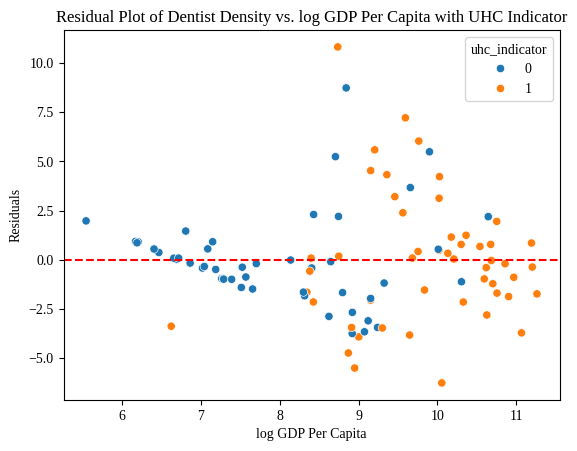

In [63]:
merged_data_with_uhc['residuals_robust'] = model_uhc_robust.resid
sns.scatterplot(data=merged_data_with_uhc, x='log_GDP_Per_Cap', y='residuals_robust', hue='uhc_indicator')
plt.axhline(0, color='red', linestyle='--')

plt.title('Residual Plot of Dentist Density vs. log GDP Per Capita with UHC Indicator')
plt.xlabel('log GDP Per Capita')
plt.ylabel('Residuals')


Text(0, 0.5, 'Dentist Density per 10,000')

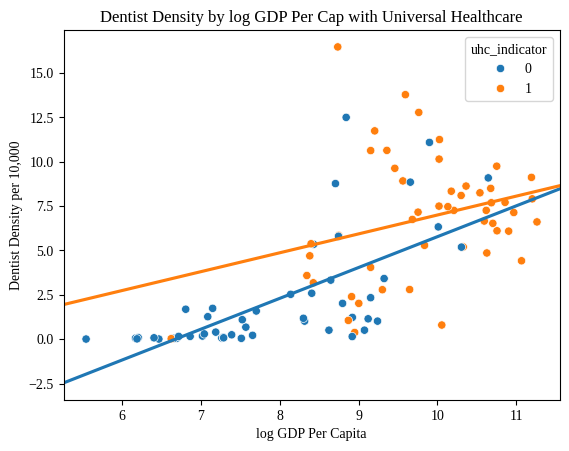

In [64]:
sns.scatterplot(data=merged_data_with_uhc, x='log_GDP_Per_Cap', y='RATE_PER_10000_N', hue='uhc_indicator')

for uhc_val in merged_data_with_uhc['uhc_indicator'].unique():
    sns.regplot(data=merged_data_with_uhc[merged_data_with_uhc['uhc_indicator'] == uhc_val],
                x='log_GDP_Per_Cap', y='RATE_PER_10000_N', scatter=False, ci=None, truncate=False,
                line_kws={'color': sns.color_palette()[uhc_val]})

plt.title('Dentist Density by log GDP Per Cap with Universal Healthcare')
plt.xlabel('log GDP Per Capita')
plt.ylabel('Dentist Density per 10,000')

In [65]:
#Saving the data that includes all 3 variables to google drive
merged_data_with_uhc.to_csv('merged_data_with_uhc.csv')